# Telco Customer Churn
#### Focused customer retention programs

##### Table of Contents
1. [Handling Missing Values](#nan)
2. [Handling Outliers](#outliers)
3. [EDA](#eda)
4. [Data Prepration](#prep)
5. [Model Training and Evaluation](#train)
    - [KNeighbours](#KNeighbours)
    - [Logistic Regression](#Logistic)
    - [SVC](#svc)
    - [Random Forest](#forest)
    - [Adaboost Classifier](#Adaboost_Classifier)
    - [Gradient Boosting Classifier](#Gradient_Boosting_Classifier)

In [1]:
import os
os.chdir('../')
%pwd

'C:\\Users\\VICTUS\\Documents\\machine-learning-projects'

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset_path = "datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(dataset_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h4>The data set includes information about:</h4>

<li>Customers who left within the last month – the column is called Churn</li>
<li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
<li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>

In [6]:
df.drop('customerID',axis=1, inplace=True)
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
#df["Churn"]= df["Churn"].map({0: "No", 1: "Yes"})
# Casting Total charges column to Float
df['TotalCharges'] = pd.to_numeric(arg=df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
target = 'Churn'
get_categorical_columns = lambda df: [col for col in df.columns if df[col].dtype=='O' and col!=target]
get_non_categorical_columns = lambda df: [col for col in df.columns if df[col].dtype!='O' and col!=target]

In [8]:
catg_cols = get_categorical_columns(df)
non_cong_cols = get_non_categorical_columns(df)

<a id="nan">  </a>
## 1. Handling NaN

In [9]:
# Null Check
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. As the number of missing values is very small we can drop these rows

In [10]:
df = df.dropna(axis=0)

In [11]:
# Null Check after handling
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id="outliers">  </a>
## 2. Handling Outliers

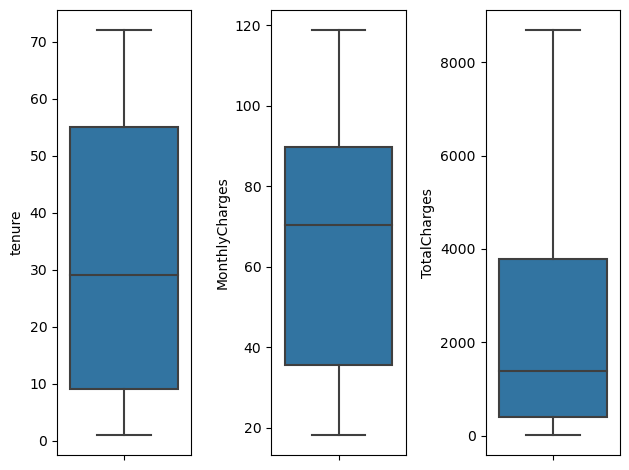

In [12]:
# Outliers check
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=len(non_cong_cols))

# Loop through the columns and create boxplots
for index, column in enumerate(non_cong_cols):
    sns.boxplot(data=df, y=column, ax=axs[index])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


After looking at the above boxplot, we can say there are no outliers detected 

<a id="eda"></a>
## 3. Exploratory Data Analysis

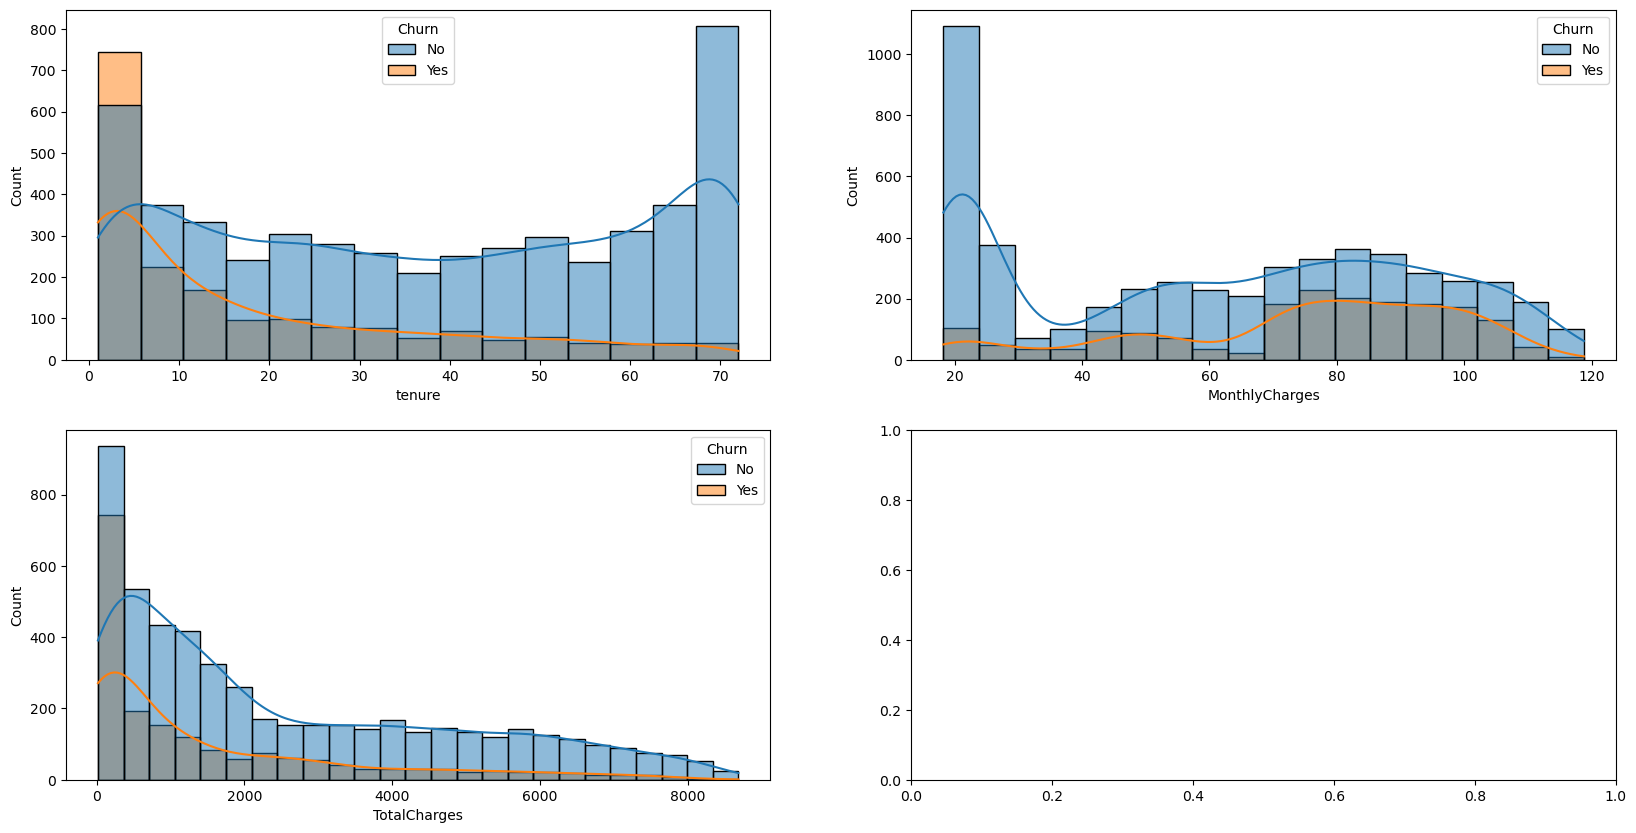

In [13]:
fig, ax = plt.subplots(ncols=2, nrows=len(non_cong_cols)//2+1, figsize=(20,10))

for index, column in enumerate(non_cong_cols):
    sns.histplot(data=df, x=column, hue=target, ax=ax[index//2,index%2], kde=True)

- Lower the tenure higher the churn rate
- Customers with higher monthly charges are more likely to churn

###   3.2 Multivariate/Bivariate Analysis

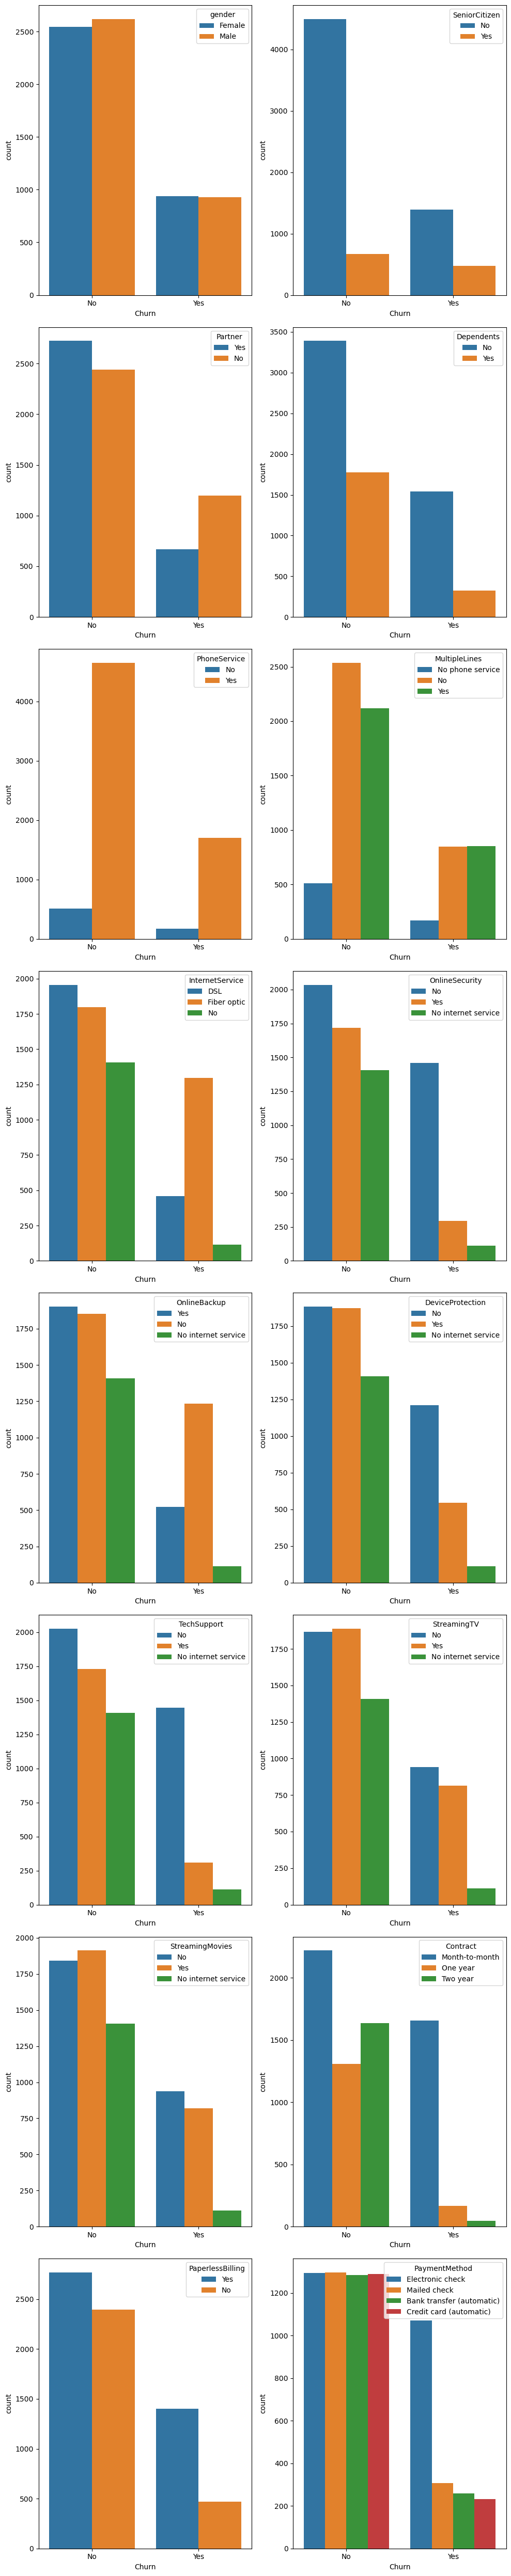

In [14]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(catg_cols)/2)), ncols=2, figsize=(10,50))

for index, column in enumerate(catg_cols):
    sns.countplot(data=df, x='Churn', ax=ax[index//2,index%2],hue=column)
    
plt.tight_layout()

- Both gender churn rate is same
- It can be observed that fraction of SeniorCitizen is very less and most of them churned.
- Customers without partners are more likely to churn
- Customers without dependents are more likely to churn
- Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn
- Most customers churn in the absence of online security, online backup, Device Protection
- Customers with no TechSupport are most likely to migrate to another service provider
- Major Customers who have plan of month-to-month have churned
- Customers with Paperless Billing are most likely to churn
- Major customers who moved out were having Electronic Check as Payment Method

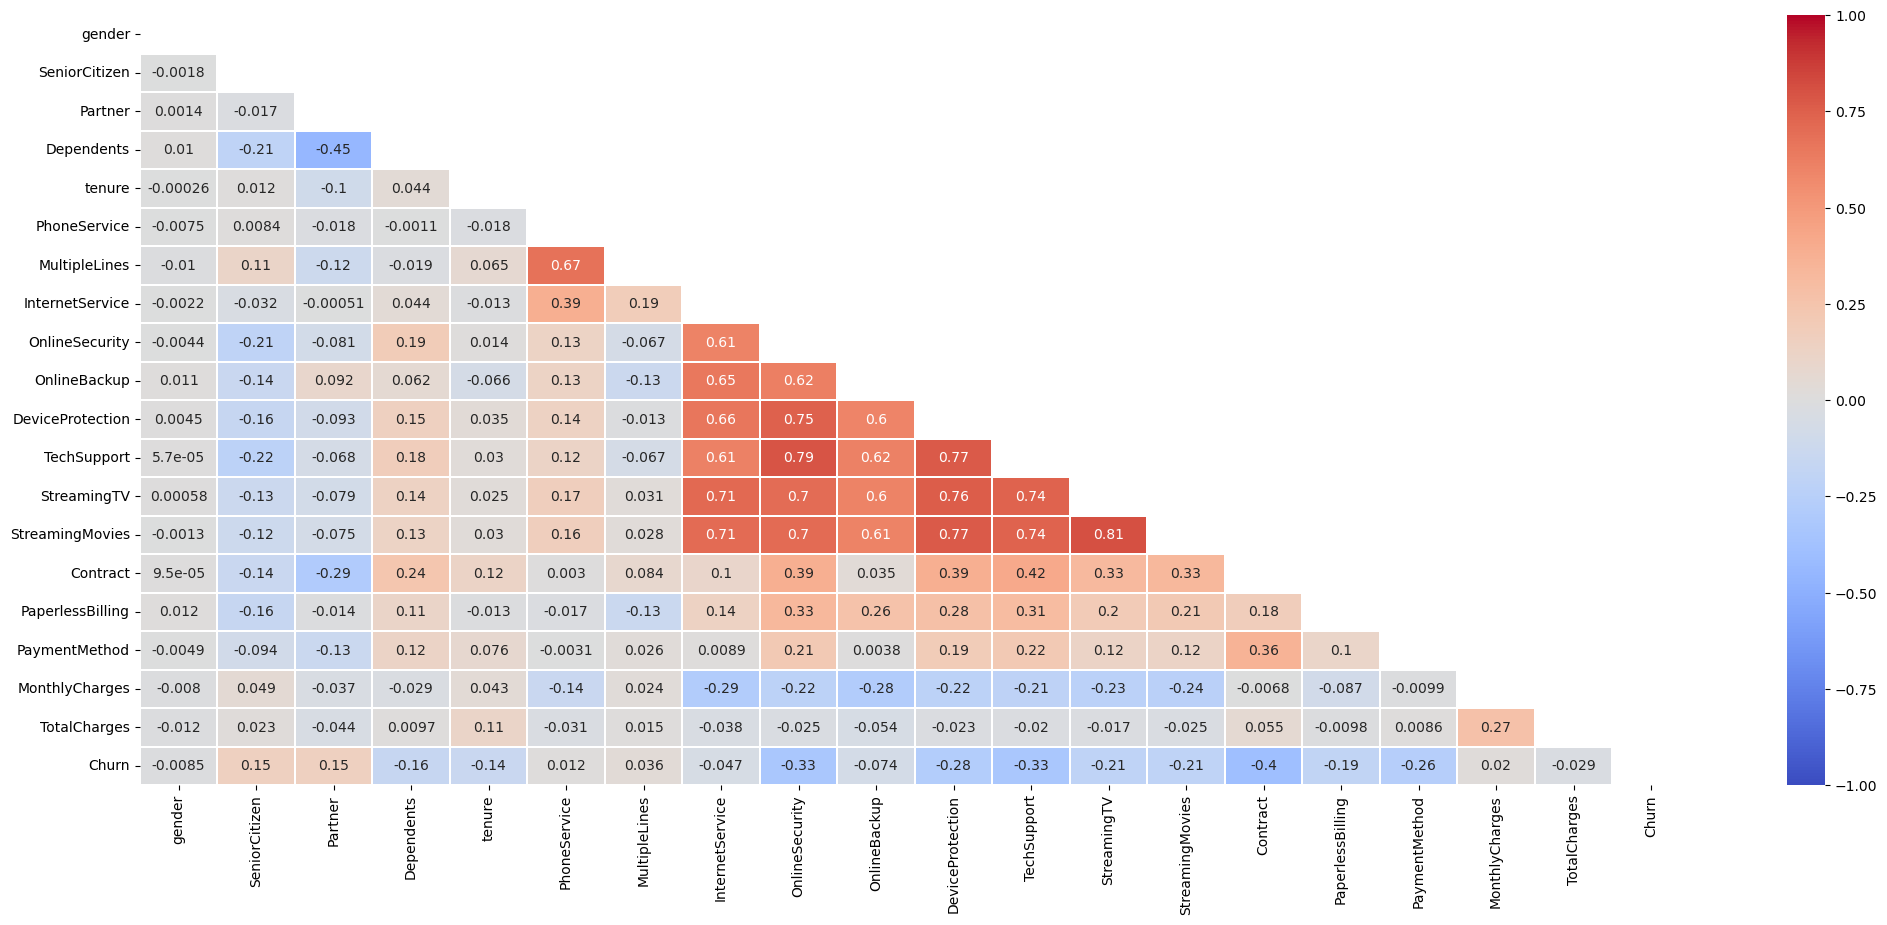

In [15]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<a id='prep'> </a>
## 4. Data Prepration

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']
cat_cols_oe = list(set(df.columns)- set(non_cong_cols) - set(cat_cols_ohe)-set([target]))

# Create separate transformers for each preprocessing step
label_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()
scaler = StandardScaler()

# Create a list of transformers
transformers = [
    ('label_encoders', label_encoder, cat_cols_oe),
    ('one_hot_encoder', one_hot_encoder, cat_cols_ohe),
    ('scaler', scaler, non_cong_cols)
]

# Create the ColumnTransformer
transformer = ColumnTransformer(transformers=transformers)

# Create a pipeline to apply the transformations
pipeline = Pipeline([('transformer', transformer)])
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('label_encoders',
                                                  OrdinalEncoder(),
                                                  ['Dependents', 'PhoneService',
                                                   'StreamingTV',
                                                   'PaperlessBilling',
                                                   'MultipleLines', 'Partner',
                                                   'OnlineSecurity',
                                                   'OnlineBackup', 'gender',
                                                   'DeviceProtection',
                                                   'SeniorCitizen',
                                                   'TechSupport',
                                                   'StreamingMovies']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['PaymentMethod', 'Contract',
                                                   'InternetService']),
                                                 ('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])]))])

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target].map({"No":0, "Yes":1})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
pipeline = pipeline.fit(X_train)
X_train = pd.DataFrame(pipeline.transform(X_train), columns=pipeline.get_feature_names_out())
X_test = pd.DataFrame(pipeline.transform(X_test), columns=pipeline.get_feature_names_out())

In [18]:
X_test.head()

,label_encoders__Dependents,label_encoders__PhoneService,label_encoders__StreamingTV,label_encoders__PaperlessBilling,label_encoders__MultipleLines,label_encoders__Partner,label_encoders__OnlineSecurity,label_encoders__OnlineBackup,label_encoders__gender,label_encoders__DeviceProtection,...,one_hot_encoder__PaymentMethod_Mailed check,one_hot_encoder__Contract_Month-to-month,one_hot_encoder__Contract_One year,one_hot_encoder__Contract_Two year,one_hot_encoder__InternetService_DSL,one_hot_encoder__InternetService_Fiber optic,one_hot_encoder__InternetService_No,scaler__tenure,scaler__MonthlyCharges,scaler__TotalCharges
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.077532,-1.476697,-0.738375
1,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.592293,-1.325569,-0.204162
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.769899,-0.192936,-0.679114
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.484806,-1.493304,-0.836401
4,0.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.592293,0.637439,1.684636


In [19]:
y_train.head()

4920    0
4838    0
731     0
6438    1
4856    1
Name: Churn, dtype: int64

<a id='train'> </a>
## 5. Model Training and Evaluation

In [43]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

<a id='KNeighbours'> </a>
#### 5.1 KNeighbours Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.7946530147895335

In [45]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1297
           1       0.64      0.51      0.57       461

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758



<Axes: >

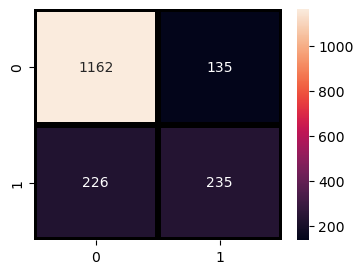

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

<a id='Logistic'> </a>
#### 5.2 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.8094425483503982

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1297
           1       0.65      0.58      0.62       461

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.74      1758
weighted avg       0.80      0.81      0.81      1758



<Axes: >

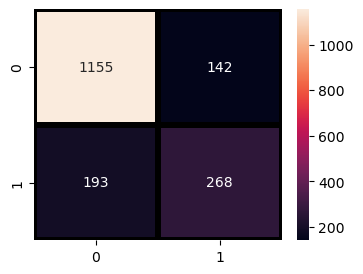

In [50]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

<a id='svc'> </a>
#### 5.3 SVC

Accuracy= 0.8071672354948806
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1297
           1       0.68      0.49      0.57       461

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



<Axes: >

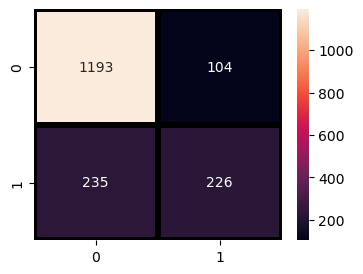

In [53]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

<a id='forest'> </a>
#### 5.4 Random Forest

Accuracy= 0.7952218430034129
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1297
           1       0.63      0.54      0.58       461

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



<Axes: >

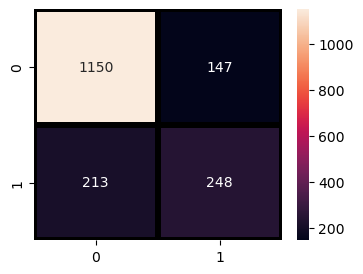

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

<a id='Adaboost_Classifier'> </a>
#### 5.5 Adaboost Classifier

Accuracy= 0.8100113765642776
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1297
           1       0.67      0.55      0.60       461

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



<Axes: >

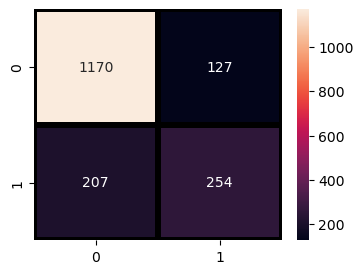

In [55]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

<a id='Gradient_Boosting_Classifier'> </a>
#### 5.6 Gradient Boosting Classifier

Accuracy= 0.8048919226393629
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1297
           1       0.66      0.54      0.59       461

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



<Axes: >

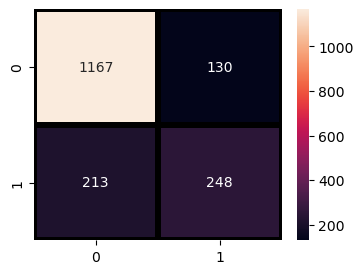

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)